<a href="https://colab.research.google.com/github/bbchen33/Data-Science/blob/master/BigData_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A lot of problems when I use the default java 11 so I had to switch it to java 8

In [2]:
!sudo apt install openjdk-8-jdk


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jre x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jre x11-utils
0 upgraded, 13 newly installed, 0 to remove and 8 not upgraded.
Need to get 7,119 kB of archives.
After this operation, 20.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/ma

In [3]:
!sudo update-alternatives --config java

There are 2 choices for the alternative java (providing /usr/bin/java).

  Selection    Path                                            Priority   Status
------------------------------------------------------------
* 0            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      manual mode
  2            /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java   1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: 2
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode


In [4]:
!java -version

openjdk version "1.8.0_222"
OpenJDK Runtime Environment (build 1.8.0_222-8u222-b10-1ubuntu1~18.04.1-b10)
OpenJDK 64-Bit Server VM (build 25.222-b10, mixed mode)


In [6]:
!pip install pyspark

     |████████████████████████████████| 215.7MB 105kB/s 
     |████████████████████████████████| 204kB 35.7MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130387 sha256=5ff316e7ae30e2d27ad9551c6c0c392701da9f21e5044a67030c4fa1c16e4647
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark


In [0]:
from google.colab import files

In [9]:
uploaded = files.upload()

Saving youtubedata.txt to youtubedata.txt


In [0]:
import pyspark


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

In [0]:
spark = SparkSession.builder.appName("Youtube_Data_Analysis").getOrCreate()

In [0]:
schema1 = StructType([
    StructField("f1", StringType(), True),
    StructField("f2", StringType(), True),
    StructField("f3", DoubleType(), True),
    StructField("f4", StringType(), True),
    StructField("f5", DoubleType(), True),
    StructField("f6", DoubleType(), True),
    StructField("f7", DoubleType(), True),
    StructField("f8", DoubleType(), True),
    StructField("f9", DoubleType(), True),
    StructField("f10", StringType(), True),
    StructField("f11", StringType(), True),
    StructField("f12", StringType(), True),
    StructField("f13", StringType(), True),
    StructField("f14", StringType(), True),
    StructField("f15", StringType(), True),
    StructField("f16", StringType(), True),
    StructField("f17", StringType(), True),
    StructField("f18", StringType(), True),
    StructField("f19", StringType(), True),
    StructField("f20", StringType(), True),
    StructField("f21", StringType(), True),
    StructField("f22", StringType(), True),
    StructField("f23", StringType(), True)])

In [0]:
df_read = spark.read \
 .option("delimiter", "\t") \
 .schema(schema1) \
 .option("inferSchema", "True") \
 .csv('youtubedata.txt')

In [15]:
df_read

DataFrame[f1: string, f2: string, f3: double, f4: string, f5: double, f6: double, f7: double, f8: double, f9: double, f10: string, f11: string, f12: string, f13: string, f14: string, f15: string, f16: string, f17: string, f18: string, f19: string, f20: string, f21: string, f22: string, f23: string]

In [0]:
df_read.createOrReplaceTempView("youtube_data") 

In [17]:
df_read.show()

+-----------+--------------------+------+----------------+-----+---------+----+-------+-------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|         f1|                  f2|    f3|              f4|   f5|       f6|  f7|     f8|     f9|        f10|        f11|        f12|        f13|        f14|        f15|        f16|        f17|        f18|        f19|        f20|        f21|        f22|        f23|
+-----------+--------------------+------+----------------+-----+---------+----+-------+-------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|QuRYeRnAuXM|EvilSquirrelPictures|1135.0|  Pets & Animals|252.0|   1075.0|4.96|   46.0|   86.0|gFa1YMEJFag|nRcovJn9xHg|3TYqkBJ9YRk|rSJ8QZWBegU|0TZqX5MbXMA|UEvVksP91kg|ZTopArY7Nbg|0RViGi2Rne8|HT_QlOJbDpg|YZev1

Read the first 5 rows of a specific column

In [18]:
df_read.select(df_read.columns[0]).take(5)

[Row(f1='QuRYeRnAuXM'),
 Row(f1='3TYqkBJ9YRk'),
 Row(f1='rSJ8QZWBegU'),
 Row(f1='nRcovJn9xHg'),
 Row(f1='UEvVksP91kg')]

Rename columns. 

In [0]:
df1 = df_read.withColumnRenamed('f1','ID').withColumnRenamed('f2','uploader')
df1 = df1.withColumnRenamed('f3','interval').withColumnRenamed('f4','category')
df1 = df1.withColumnRenamed('f5','length').withColumnRenamed('f6','views')
df1 = df1.withColumnRenamed('f7','rating').withColumnRenamed('f8','num_of_rating')

In [20]:
df1

DataFrame[ID: string, uploader: string, interval: double, category: string, length: double, views: double, rating: double, num_of_rating: double, f9: double, f10: string, f11: string, f12: string, f13: string, f14: string, f15: string, f16: string, f17: string, f18: string, f19: string, f20: string, f21: string, f22: string, f23: string]

Determine the minimal, average and maximal value of a column

In [21]:
from pyspark.sql.functions import mean, min, max
df1.select([min('length'),mean('length'),max('length')]).show()

+-----------+------------------+-----------+
|min(length)|       avg(length)|max(length)|
+-----------+------------------+-----------+
|        1.0|232.90629611411705|     5202.0|
+-----------+------------------+-----------+



In [32]:
df1.orderBy(df1.length.desc()).show(10)

+-----------+------------------+--------+---------------+------+---------+------+-------------+------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|         ID|          uploader|interval|       category|length|    views|rating|num_of_rating|    f9|        f10|        f11|        f12|        f13|        f14|        f15|        f16|        f17|        f18|        f19|        f20|        f21|        f22|        f23|
+-----------+------------------+--------+---------------+------+---------+------+-------------+------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|MNvUSfRHzdQ|        AtheneWins|  1073.0| People & Blogs|5202.0| 760935.0|  4.59|       4440.0|2441.0|rVhGT_eB03g|mSgwvL4Gdyw|mr5ghuaTK14|6W0-dx5FxrA|65w47grytvU|WW68Yx-_VZA|UbN8PajPngM|v

In [49]:
df1.orderBy(df1.length).groupby(df1.length).count().show()

+------+-----+
|length|count|
+------+-----+
|  null|   34|
|   1.0|    2|
|   4.0|    9|
|   5.0|    6|
|   6.0|   12|
|   7.0|   14|
|   8.0|    5|
|   9.0|   20|
|  10.0|   13|
|  11.0|    8|
|  12.0|    9|
|  13.0|   13|
|  14.0|   18|
|  15.0|   15|
|  16.0|   10|
|  17.0|    7|
|  18.0|   16|
|  19.0|    6|
|  20.0|   11|
|  21.0|   12|
+------+-----+
only showing top 20 rows



In [67]:
df1.groupby('uploader').count().show()

+------------------+-----+
|          uploader|count|
+------------------+-----+
|    chinesemobster|    5|
|           colt605|    1|
|       metroid1003|    1|
|     becoolsodapop|    1|
|            ShdwHg|    1|
|          voytex86|    1|
|        amazingxx3|    1|
|          deerdue2|    1|
|       eXoOutsider|    2|
|       MaNaTurquia|    1|
|McCaskill4Missouri|    2|
|          laihiube|    1|
|           RobUniv|    1|
|          rpm13003|    2|
|         djlogitek|    1|
|         mi3456789|    1|
|         rsivracer|    1|
|      SamHarrisCOM|    1|
|           GmnBull|    1|
|diegomaltaespinoza|    1|
+------------------+-----+
only showing top 20 rows



In [72]:
df1.filter(df1.length > 1000).count()

27

In [79]:
df1.groupby(df1.category).count().show()

+--------------------+-----+
|            category|count|
+--------------------+-----+
|           Education|   65|
|       Entertainment|  908|
|     Travel & Events|  112|
|Science & Technology|   80|
|              Sports|  251|
|                null|   34|
|       Howto & Style|  137|
|Nonprofits & Acti...|   42|
|    Film & Animation|  260|
|      People & Blogs|  398|
|     News & Politics|  333|
|      Pets & Animals|   95|
|                UNA |   32|
|    Autos & Vehicles|   77|
|               Music|  862|
|              Comedy|  414|
+--------------------+-----+



In [87]:
columns_to_analyze = ['length','views']
df1.select(*[columns_to_analyze]).describe().show()

+-------+------------------+------------------+
|summary|            length|             views|
+-------+------------------+------------------+
|  count|              4066|              4066|
|   mean|232.90629611411705|194695.10944417116|
| stddev|219.47567245418742|1488250.2854682275|
|    min|               1.0|               0.0|
|    max|            5202.0|       6.5341925E7|
+-------+------------------+------------------+



In [90]:
df1_pd = df1.toPandas()
df1_pd.head()

,ID,uploader,interval,category,length,views,rating,num_of_rating,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23
0,QuRYeRnAuXM,EvilSquirrelPictures,1135.0,Pets & Animals,252.0,1075.0,4.96,46.0,86.0,gFa1YMEJFag,nRcovJn9xHg,3TYqkBJ9YRk,rSJ8QZWBegU,0TZqX5MbXMA,UEvVksP91kg,ZTopArY7Nbg,0RViGi2Rne8,HT_QlOJbDpg,YZev1imoxX8,8qQrrfUTmh0,zQ83d_D2MGs,u6_DQQjLsAw,73Wz9CQFDtE
1,3TYqkBJ9YRk,hggh22,1135.0,Comedy,169.0,228.0,5.00,5.0,3.0,QuRYeRnAuXM,gFa1YMEJFag,UEvVksP91kg,rSJ8QZWBegU,nRcovJn9xHg,sVkuOk4jmCo,ZTopArY7Nbg,HT_QlOJbDpg,0RViGi2Rne8,ShhClb6J-NA,g9e1alirMhc,YZev1imoxX8,I4yKEK9o8gA,zQ83d_D2MGs
2,rSJ8QZWBegU,TimeGem,1135.0,Entertainment,95.0,356.0,4.31,13.0,1.0,QuRYeRnAuXM,gFa1YMEJFag,UEvVksP91kg,3TYqkBJ9YRk,nRcovJn9xHg,sVkuOk4jmCo,ZTopArY7Nbg,gBcu22Vv1nY,HT_QlOJbDpg,0RViGi2Rne8,ShhClb6J-NA,g9e1alirMhc,YZev1imoxX8,I4yKEK9o8gA
3,nRcovJn9xHg,wooochacha,1135.0,Entertainment,118.0,1115.0,2.23,57.0,73.0,QuRYeRnAuXM,gFa1YMEJFag,UEvVksP91kg,3TYqkBJ9YRk,ZTopArY7Nbg,gBcu22Vv1nY,HT_QlOJbDpg,0RViGi2Rne8,ShhClb6J-NA,g9e1alirMhc,YZev1imoxX8,I4yKEK9o8gA,zQ83d_D2MGs,1GKaVzNDbuI
4,UEvVksP91kg,johnx113,1135.0,Entertainment,83.0,281.0,2.67,9.0,16.0,gFa1YMEJFag,QuRYeRnAuXM,3TYqkBJ9YRk,0TZqX5MbXMA,rSJ8QZWBegU,nRcovJn9xHg,sVkuOk4jmCo,ZTopArY7Nbg,HT_QlOJbDpg,0RViGi2Rne8,g9e1alirMhc,YZev1imoxX8,I4yKEK9o8gA,zQ83d_D2MGs


In [93]:
df1_pd.uploader.value_counts()

machinima               21
theevang1               20
kushtv                  20
rhyshuw1                19
gselander               19
hotforwords             19
NBA                     19
AtheneWins              18
supermac18              18
puebloplug              17
juan833blue             17
aka32                   17
somedia                 17
tokiohotelchannel       17
davidisbetterthenyou    17
anonymozzybinoswald     15
VancouverFilmSchool     15
powerballsvideos        14
mrpregnant              14
MediocreFilms           13
HortonGB                12
reneewoerdman           12
AsikTV                  12
NFBCmedia               12
zonamagia               11
VMOPO                   11
coolsmurf               11
TheOnion                10
nerimon                 10
oskay                    9
                        ..
threefirstnames          1
Kabino14                 1
AsthmaticHorn            1
rehab07                  1
thetimman00              1
FreeWingz                1
t

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'number of video')

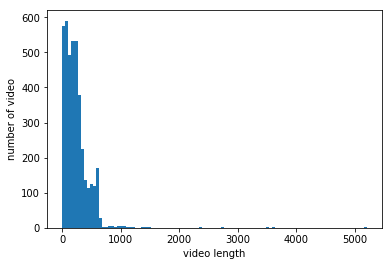

In [97]:
import matplotlib.pyplot as plt
plt.hist(df1_pd.length, bins = 100)
plt.xlabel('video length')
plt.ylabel('number of video')

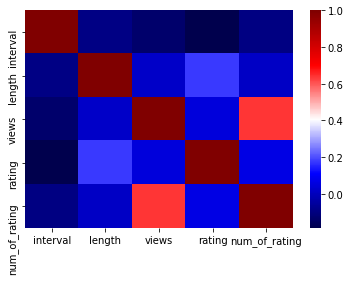

In [107]:
import seaborn as sns
sns.heatmap(df1_pd[df1_pd.columns[:8]].corr(), cmap = 'seismic')

Number of views has a high correlation with the number of rating. Not surprising.